## Sentiment Analysis of Real-time Flipkart Product Reviews


### Objective
The objective of this project is to classify customer reviews as positive or negative and understand the pain points of customers who write negative reviews. By analyzing the sentiment of reviews, we aim to gain insights into product features that contribute to customer satisfaction or dissatisfaction.


### Dataset
A team of Data Engineers have already scraped real-time data from Flipkart website.
Use the dataset given below to solve the problem statement.
The dataset consists of 8,518 reviews for the "YONEX MAVIS 350 Nylon Shuttle" product from Flipkart. Each review includes features such as Reviewer Name, Rating, Review Title, Review Text, Place of Review, Date of Review, Up Votes, and Down Votes.


In [1]:
#importing required libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading csv file using pandas

df = pd.read_csv(r"C:\Users\India\Downloads\reviews_data_dump\reviews_badminton\data.csv")

In [3]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [4]:
# gives the in formation about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [5]:
# checking for null values

df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [ ]:
# As,now working on sentimental analysis i need only 2 cols from the entire dataset which are used for model building & for prediction
# here, the input col is  'Review text'
# the output(target) variable is 'Ratings'

In [6]:
# filling the missing values in  'Review text'  col by using fillna method.
df['Review text'].fillna(df['Review text'].mode()[0],inplace=True)

In [7]:
df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          0
Ratings              0
dtype: int64

### Checking for duplicates in the df

In [8]:
df.duplicated().sum()

4

In [9]:
# removing the duplicates from df.
df = df.drop_duplicates()

In [10]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8509,NaN,NaN,NaN,NaN,NaN,NaN,Not sure why we have charged for this product ...,1
8510,NaN,NaN,NaN,NaN,NaN,NaN,GoodREAD MORE,1
8512,NaN,NaN,NaN,NaN,NaN,NaN,GoodREAD MORE,2
8513,NaN,NaN,NaN,NaN,NaN,NaN,GoodREAD MORE,5


In [11]:
df.shape

(8514, 8)

<AxesSubplot:xlabel='Ratings', ylabel='count'>

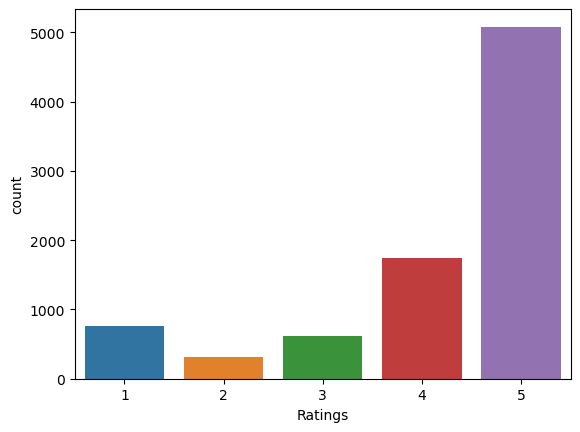

In [12]:
# a countplot for target col...
# Most of the reviews given by customers are positive reviews.(gives 5star ratings.)

sns.countplot(x='Ratings',data=df)

#### Function to classify reviews as positive or negative based on ratings

In [16]:
def classify_review(rating):
    if rating >= 3.0:
        return 'Positive'
    else:
        return 'Negative'

In [17]:
df['Ratings'] = df['Ratings'].apply(classify_review)

C:\Users\India\AppData\Local\Temp\ipykernel_17316\1564057766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ratings'] = df['Ratings'].apply(classify_review)


### Identifying Input & Output variables

In [23]:
# independent variable
X=df[['Review text']]

In [24]:
#target variable
y=df[['Ratings']]

### Splitting the data into Train & Test data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# training data of size 80%
# test data of size 20%

X_train,x_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state=35)

In [27]:
# Train data
X_train

,Review text
337,"Very good shutles ,READ MORE"
3460,OkREAD MORE
4793,not badREAD MORE
7747,"Good quality,delivered earlier than expected d..."
5333,okay okay shuttlesREAD MORE
...,...
3321,Great and perfect with no defectREAD MORE
3007,Quality is not goodREAD MORE
7148,these shuttles are as good as feather shuttle ...
1295,Good shuttlecockREAD MORE


In [28]:
y_train

,Ratings
337,Positive
3460,Positive
4793,Negative
7747,Positive
5333,Positive
...,...
3321,Positive
3007,Negative
7148,Positive
1295,Positive


In [29]:
#Test data
x_test

,Review text
7890,Just greatREAD MORE
1587,Original . Awesome. Love to FlipkartREAD MORE
6624,Very bad quality shuttle.....and very very pat...
8269,GoodREAD MORE
8079,Shuttle is goodREAD MORE
...,...
6863,niceREAD MORE
334,GoodREAD MORE
3291,Good qualityREAD MORE
987,One of the best shuttle for outdoor playREAD MORE


In [30]:
y_test

,Ratings
7890,Positive
1587,Positive
6624,Positive
8269,Positive
8079,Positive
...,...
6863,Positive
334,Positive
3291,Positive
987,Positive


### Data Preprocessing on Train & Test data

In [31]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [32]:
stem = PorterStemmer()

In [33]:
lemma = WordNetLemmatizer()

In [111]:
# steps involved in data preprocesing

# 1.removing special characters,unwanted numericals 
# 2.normalize the case(lower)
# 3.tokenization
# 4.removing stop words
# 5.stemmatization or lemmatization

In [34]:
def preprocess(data):
    
    # removes special characters
    sentence = re.sub("[^a-zA-Z]"," ",data)
    
    # converts words to lowercase
    sentence = sentence.lower()
    
    # tokenization
    sentence = sentence.split()
    
    #removes the stop words
    sentence = [word for word in sentence if word not in stopwords.words('english')]
    
    # can apply stem or lemm
    # applying lemmatization
    sentence = [lemma.lemmatize(word) for word in sentence]
    
    sentence=  " ".join(sentence)
    
    return sentence

In [35]:
#applying preprocesing on train_data

X_train= X_train['Review text'].apply(preprocess)

In [36]:
X_train

337                                     good shutles read
3460                                               okread
4793                                              badread
7747    good quality delivered earlier expected date read
5333                               okay okay shuttlesread
                              ...                        
3321                             great perfect defectread
3007                                     quality goodread
7148    shuttle good feather shuttle flight life good ...
1295                                 good shuttlecockread
5833                                     nice productread
Name: Review text, Length: 6811, dtype: object

In [37]:
#applying preprocessing on test_data
x_test = x_test['Review text'].apply(preprocess)

In [38]:
x_test

7890                                    greatread
1587           original awesome love flipkartread
6624    bad quality shuttle pathetic packing read
8269                                     goodread
8079                             shuttle goodread
                          ...                    
6863                                     niceread
334                                      goodread
3291                             good qualityread
987             one best shuttle outdoor playread
6001      good product best delivery flipkartread
Name: Review text, Length: 1703, dtype: object

### Bag of words/CountVectorizer

In [ ]:
#converting text to numerical representation
#this is one way of feature extraction

In [146]:
from sklearn.feature_extraction.text import CountVectorizer

In [147]:
cv = CountVectorizer()

In [148]:
%time X_train_num = cv.fit_transform(X_train)

Wall time: 199 ms


In [149]:
%time x_test_num = cv.transform(x_test)

Wall time: 83.4 ms


### Building a model

In [150]:
#naive_bayes model

from sklearn.naive_bayes import MultinomialNB

In [151]:
nb_model= MultinomialNB()

In [152]:
nb_model.fit(X_train_num,y_train)

C:\Users\India\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [153]:
X_train_num.shape

(6811, 2667)

In [154]:
y_train.shape

(6811, 1)

### Evaluation

In [155]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [157]:
y_train_pred = nb_model.predict(X_train_num)

In [158]:
y_train_pred

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [159]:
train_score=accuracy_score(y_train,y_train_pred)

In [160]:
train_score

0.931874908236676

In [161]:
y_pred=nb_model.predict(x_test_num)

In [162]:
y_pred

array(['Positive', 'Positive', 'Negative', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [163]:
test_score=accuracy_score(y_pred,y_test)

In [164]:
test_score

0.9242513211978861

In [165]:
#confusion matrix
confusion_matrix(y_train, y_train_pred)

array([[ 509,  357],
       [ 107, 5838]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted')

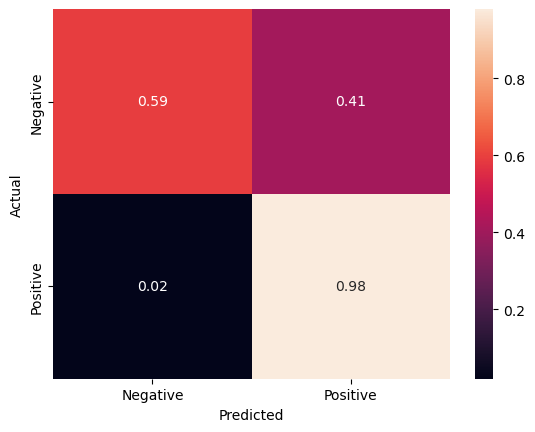

In [166]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_train, y_train_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 23.52222222222222, 'Predicted')

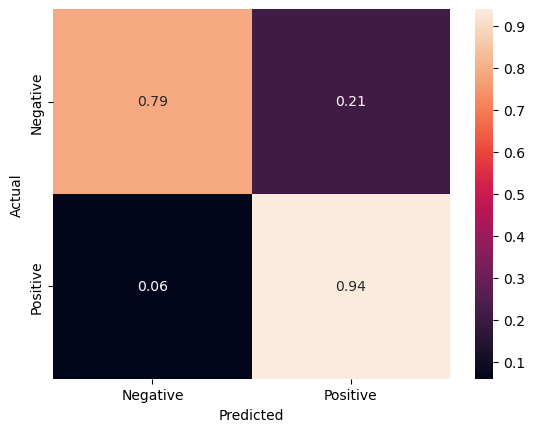

In [167]:
cm = confusion_matrix(y_pred,y_test)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

### Implementing various Algorithms to find the Best Model

In [42]:
from joblib import Memory
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from gensim.models import Word2Vec

In [43]:
import warnings

warnings.filterwarnings('ignore')

In [53]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
        'vectorization': [CountVectorizer(),TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*" * 10, algo, "*" * 10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='f1',  
                               return_train_score=True,
                               verbose=1)
    grid_search.fit(X_train, y_train)
    best_models[algo] = grid_search.best_estimator_
#     print('Score on Test Data:', grid_search.score(x_test, y_test, pos_label='Positive'))
    y_pred = grid_search.best_estimator_.predict(x_test)
    f1 = f1_score(y_test, y_pred, pos_label='Positive')  
    print('F1 Score on Test Data:', f1)

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
F1 Score on Test Data: 0.9548302011210024
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
F1 Score on Test Data: 0.9409015025041736
********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
F1 Score on Test Data: 0.9360525406152783


In [54]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier', DecisionTreeClassifier())])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    l1_ratio=0.4, penalty='elasticnet',
                                    solver='saga'))])



In [174]:
import joblib
import os

In [56]:
from sklearn.metrics import f1_score

In [61]:
save_dir = 'D:\\models'

for name, model in best_models.items():
    print("*" * 10, name, "*" * 10)
    
    joblib.dump(model, os.path.join(save_dir, f'{name}.pkl'))
    loaded_model = joblib.load(os.path.join(save_dir, f'{name}.pkl'))
    
    %time y_test_pred = loaded_model.predict(x_test)

    f1 = f1_score(y_test, y_test_pred, pos_label='Positive')

    print("F1 Score (Positive Class):", f1)
    print("Model Size:", os.path.getsize(os.path.join(save_dir, f'{name}.pkl')), "Bytes")

********** naive_bayes **********
Wall time: 13.9 ms
F1 Score (Positive Class): 0.9548302011210024
Model Size: 82190 Bytes
********** decision_tree **********
Wall time: 13.1 ms
F1 Score (Positive Class): 0.9409015025041736
Model Size: 224436 Bytes
********** logistic_regression **********
Wall time: 9.97 ms
F1 Score (Positive Class): 0.9360525406152783
Model Size: 58448 Bytes
